Project topic: Changes in game production and impact on player satisfaction
Dataset: https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam/data
Objective: Observe the changes in game details and user reviews

In [68]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#loading data
games = pd.read_csv('games_recommendations/games.csv')

In [6]:
#preview of games data
games.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [7]:
#checking column data types and null values

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


Dataset has 50872 games, with 13 columns, and no null values. 
Out of the 13 columns, 4 of them contain booleand data, 3 contain floats, 3 integers and 3 object data.

In [11]:
#summary statistics

games.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.087200e+04,50872.000000,5.087200e+04,50872.000000,50872.000000,50872.000000
mean,1.055224e+06,77.052033,1.824425e+03,8.620325,8.726788,5.592212
std,6.103249e+05,18.253592,4.007352e+04,11.514164,11.507021,18.606679
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.287375e+05,67.000000,1.900000e+01,0.990000,0.990000,0.000000
50%,9.860850e+05,81.000000,4.900000e+01,4.990000,4.990000,0.000000
75%,1.524895e+06,91.000000,2.060000e+02,10.990000,11.990000,0.000000
max,2.599300e+06,100.000000,7.494460e+06,299.990000,299.990000,90.000000


app_id should be ignored as it does not have any significant information.

positive_ratio shows us that the highest rated game has 100% positive feedback and the lowest rated has 0% positive feedback. On average games have 77% positive feedback.

user_reviews shows the number of reviews the game recieved from its users, and we can observe the highest, lowest and average amount of reviews recieved.

price_final shows us that the most expensive game reached nearly 300 USD, whereas the cheapest game was free. 25% of all games cost under 1 USD, and 50% of games cost under 5 USD, but the average game price was 8.6 USD.

price_original displays similar data as price_final, as it is the price of the same game before discount and not many games were discounted, as we will see in the following.

discount shows us that at least 75% of games had no discount applied, but the game with the highest discount was lowered by 90%. That said, the average discount was 5.6%

In [13]:
#Once again confirming that there are no null values

games.isnull().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [18]:
#Check if there are any duplicates

games.duplicated().any()

False

We can see that there are no duplicates in this dataset

In [20]:
#List all columns in the dataset, to see which ones can be removed

games.columns

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck'],
      dtype='object')

All columns seem relatively relevant, so none will be removed at this point.

In [24]:
#Trying to see if there are any strangely formatted ratings

games['rating'].unique()

array(['Very Positive', 'Positive', 'Mixed', 'Mostly Positive',
       'Overwhelmingly Positive', 'Negative', 'Mostly Negative',
       'Overwhelmingly Negative', 'Very Negative'], dtype=object)

In [71]:
#No strangely formatted ratings, so now they can be converted to numerical data. That is done by mapping these values to their respective numerical value, and creating a separate column to store that data.

# Defining the mapping dictionary
rating_mapping = {
    'Overwhelmingly Negative': 0,
    'Mostly Negative': 1,
    'Very Negative': 2,
    'Negative': 3,
    'Mixed': 4,
    'Positive': 5,
    'Very Positive': 6,
    'Mostly Positive': 7,
    'Overwhelmingly Positive': 8
}

# Applying the mapping to the 'rating' column
games['rating_numeric'] = games['rating'].map(rating_mapping)

# Checking the result
print(games[['rating', 'rating_numeric']].head(15))
print(games[['rating', 'rating_numeric']].tail(15))

             rating  rating_numeric
0     Very Positive               6
1          Positive               5
2     Very Positive               6
3             Mixed               4
4     Very Positive               6
5     Very Positive               6
6   Mostly Positive               7
7             Mixed               4
8     Very Positive               6
9   Mostly Positive               7
10    Very Positive               6
11    Very Positive               6
12    Very Positive               6
13    Very Positive               6
14    Very Positive               6
                        rating  rating_numeric
50857          Mostly Positive               7
50858            Very Positive               6
50859          Mostly Positive               7
50860  Overwhelmingly Positive               8
50861            Very Positive               6
50862          Mostly Positive               7
50863            Very Positive               6
50864                    Mixed               4
5

In [72]:
#It seems correct, but to make sure we will count the amount of each value for both data types

print(games['rating'].value_counts())
print(games['rating_numeric'].value_counts())

rating
Positive                   13502
Very Positive              13139
Mixed                      12157
Mostly Positive             8738
Mostly Negative             1849
Overwhelmingly Positive     1110
Negative                     303
Very Negative                 60
Overwhelmingly Negative       14
Name: count, dtype: int64
rating_numeric
5    13502
6    13139
4    12157
7     8738
1     1849
8     1110
3      303
2       60
0       14
Name: count, dtype: int64


In [73]:
#Now that it is confirmed values are correctly mapped/converted, we can drop the rating column and remain with the numerical values

games = games.drop("rating", axis=1)

In [74]:
#Seeing what we are left with

games.head()

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,rating_numeric
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,84,2199,9.99,9.99,0.0,True,6
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,85,21,2.99,2.99,0.0,True,5
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,92,3722,14.99,14.99,0.0,True,6
3,226560,Escape Dead Island,2014-11-18,True,False,False,61,873,14.99,14.99,0.0,True,4
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,88,8784,11.99,11.99,0.0,True,6


In [75]:
#Converting date_release from object type to datetime

games['date_release'] = pd.to_datetime(games['date_release'])

# Checking the result
print(games['date_release'].dtype)
print(games['date_release'].head())


datetime64[ns]
0   2008-11-21
1   2011-08-03
2   2013-04-24
3   2014-11-18
4   2014-10-27
Name: date_release, dtype: datetime64[ns]


<Axes: ylabel='Frequency'>

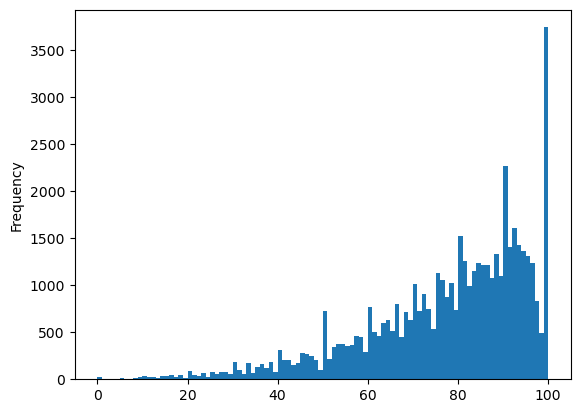

In [45]:
#Visualising the positive ratio of game reviews using a histogram

games['positive_ratio'].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

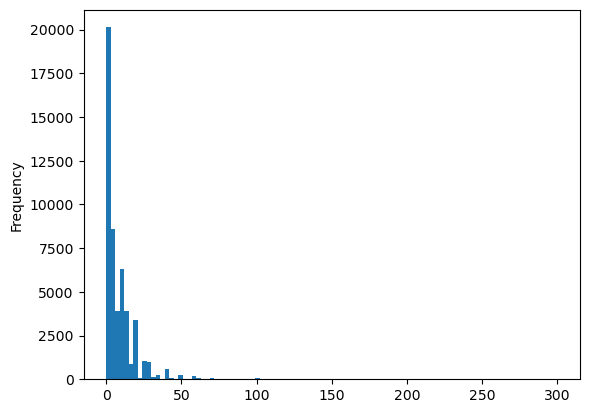

In [51]:
#Visualising prices using a histogram

games['price_final'].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

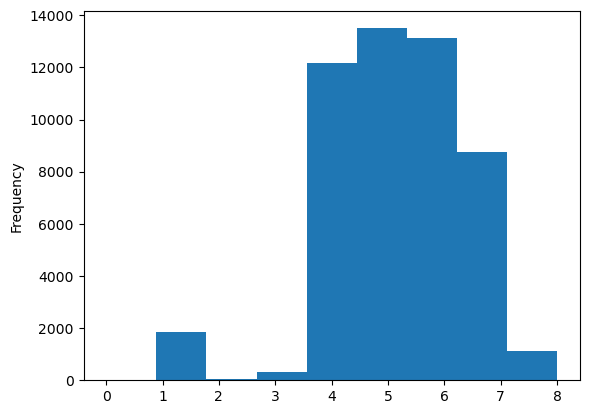

In [78]:
#Visualising ratings using a histogram

games['rating_numeric'].plot.hist(bins=9)

In [88]:
#Finding the percentages of games that support different platforms

# Count the total number of games
total_games = games.shape[0]

# Count the number of games that support windows, mac and linux
win_games = games[games['win'] == True].shape[0]
mac_games = games[games['mac'] == True].shape[0]
linux_games = games[games['linux'] == True].shape[0]
deck_games = games[games['steam_deck'] == True].shape[0]

# Calculate the percentage
percentage_win_games = (win_games / total_games) * 100
percentage_mac_games = (mac_games / total_games) * 100
percentage_linux_games = (linux_games / total_games) * 100
percentage_deck_games = (deck_games / total_games) * 100

# Print the result
print(f"Percentage of games that support Windows: {percentage_win_games:.2f}%")
print(f"Percentage of games that support MacOS: {percentage_mac_games:.2f}%")
print(f"Percentage of games that support Linux: {percentage_linux_games:.2f}%")
print(f"Percentage of games that support Steam Deck: {percentage_deck_games:.2f}%")

Percentage of games that support Windows: 98.44%
Percentage of games that support MacOS: 25.59%
Percentage of games that support Linux: 17.77%
Percentage of games that support Steam Deck: 100.00%


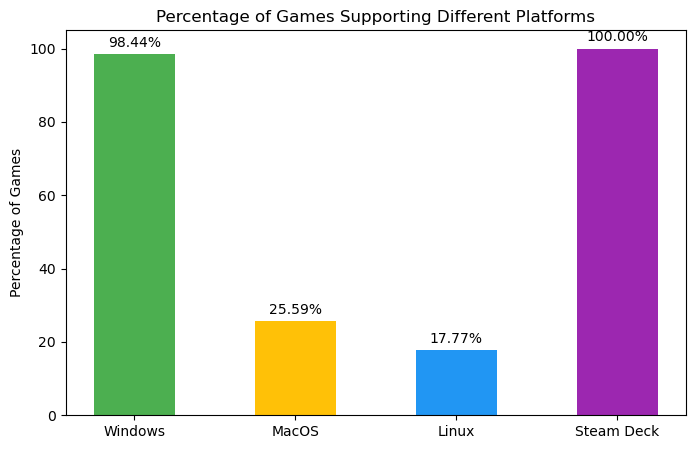

In [96]:
#Visualizing these percentages

platforms = ['Windows', 'MacOS', 'Linux', 'Steam Deck']
percentages = [percentage_win_games, percentage_mac_games, percentage_linux_games, percentage_deck_games]

# Bar chart setup
x = np.arange(len(platforms))  # The label locations
width = 0.5  # The width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

# Create a bar chart
ax.bar(x, percentages, width, color=['#4CAF50', '#FFC107', '#2196F3', '#9C27B0'])

# Add labels and title
ax.set_ylabel('Percentage of Games')
ax.set_title('Percentage of Games Supporting Different Platforms')
ax.set_xticks(x)
ax.set_xticklabels(platforms)

# Add value labels on top of each bar
for i, v in enumerate(percentages):
    ax.text(x[i], v + 2, f'{v:.2f}%', ha='center')

plt.show()


From this we can see that all Steam games have Steam Deck support, which is to be expected. In addition, almost all games are made for Windows, whereash only 25.6% of games have Mac support, and just 17.8% of games have Linux support.

In [102]:
#Now I want to see what is the average game rating for each platform

avg_win_rating = games[games['win'] == True]['rating_numeric'].mean()
avg_mac_rating = games[games['mac'] == True]['rating_numeric'].mean()
avg_linux_rating = games[games['linux'] == True]['rating_numeric'].mean()
avg_steam_deck_rating = games[games['steam_deck'] == True]['rating_numeric'].mean()

# Display the results
print(f"Average Rating for Windows games: {avg_win_rating:.2f}")
print(f"Average Rating for MacOS games: {avg_mac_rating:.2f}")
print(f"Average Rating for Linux games: {avg_linux_rating:.2f}")
print(f"Average Rating for Steam Deck games: {avg_steam_deck_rating:.2f}")



Average Rating for Windows games: 5.27
Average Rating for MacOS games: 5.46
Average Rating for Linux games: 5.47
Average Rating for Steam Deck games: 5.27


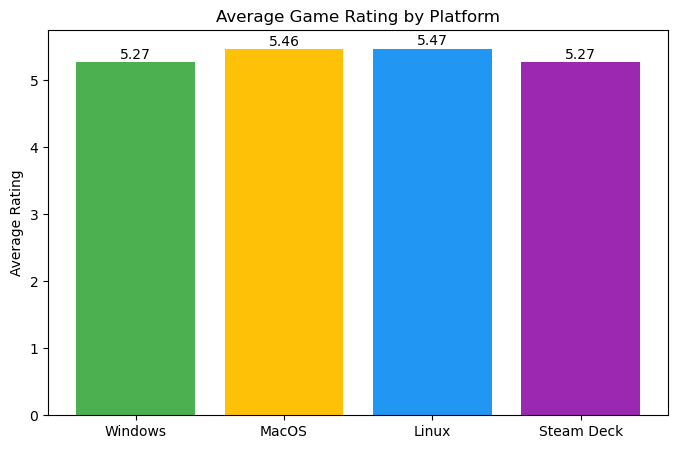

In [108]:
#Visualization
import matplotlib.pyplot as plt

platforms = ['Windows', 'MacOS', 'Linux', 'Steam Deck']
avg_ratings = [avg_win_rating, avg_mac_rating, avg_linux_rating, avg_steam_deck_rating]

# Plot the average ratings
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(platforms, avg_ratings, color=['#4CAF50', '#FFC107', '#2196F3', '#9C27B0'])

# Add labels and title
ax.set_ylabel('Average Rating')
ax.set_title('Average Game Rating by Platform')

# Add value labels on top of each bar
for i, v in enumerate(avg_ratings):
    ax.text(i, v + 0.05, f'{v:.2f}', ha='center')

plt.show()


We can see that there is no significant difference between ratings for different platforms. With that we can conclude that no platform lacks or excels in its respective game development.

In [110]:
#Now I want to see how the average rating of games changed over time, or if it changed at all.

#To do this firstly I will group all games by the year they were released in
games['release_year'] = games['date_release'].dt.year
avg_rating_by_year = games.groupby('release_year')['rating_numeric'].mean()

# Display the results
print(avg_rating_by_year)

release_year
1997    6.000000
1998    8.000000
1999    7.000000
2000    7.000000
2001    6.500000
2002    6.000000
2003    5.000000
2004    6.750000
2005    6.333333
2006    6.089286
2007    5.975610
2008    5.636986
2009    5.552795
2010    5.464789
2011    5.353723
2012    5.350442
2013    5.405109
2014    5.199375
2015    5.172798
2016    5.172725
2017    5.122069
2018    5.191357
2019    5.315404
2020    5.325183
2021    5.326247
2022    5.311218
2023    5.280584
Name: rating_numeric, dtype: float64


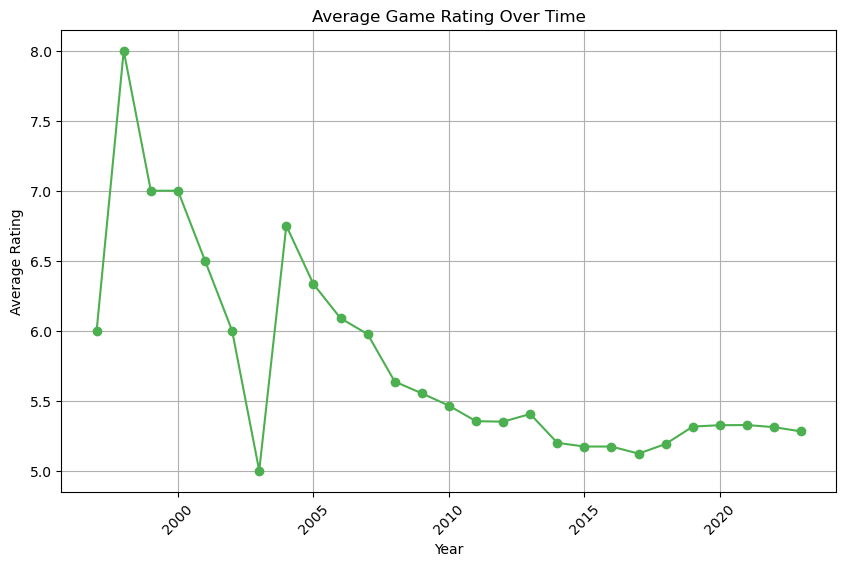

In [119]:
# Plotting the average ratings over time (by year)
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, marker='o', linestyle='-', color='#4CAF50')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Game Rating Over Time')

# Add grid and display
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


With this plot we can see how the game ratings have become lower over time, with an unusual drop in 2003. This could either mean that the game development got worse, or, the more likely option, that the players became stricter and more rigorous with their reviews.
With the increase in game players there is an increase in people who review the game, which may be positive or negative. I will try to visualize this to see how it compares with this plot.

In [118]:
# Group by release year and calculate the total number of reviews for each year
reviews_by_year = games.groupby('release_year')['user_reviews'].sum()

# Display the results
print(reviews_by_year)

release_year
1997       2757
1998      72475
1999      20670
2000     139513
2001      12279
2002       6784
2003       3657
2004     138100
2005      13267
2006     920187
2007    1521034
2008     459236
2009    1353342
2010    1010891
2011    2081252
2012    9826670
2013    6302678
2014    3639486
2015    7522534
2016    7285549
2017    9674057
2018    8575760
2019    6718000
2020    9024436
2021    6996741
2022    6404342
2023    3086451
Name: user_reviews, dtype: int64


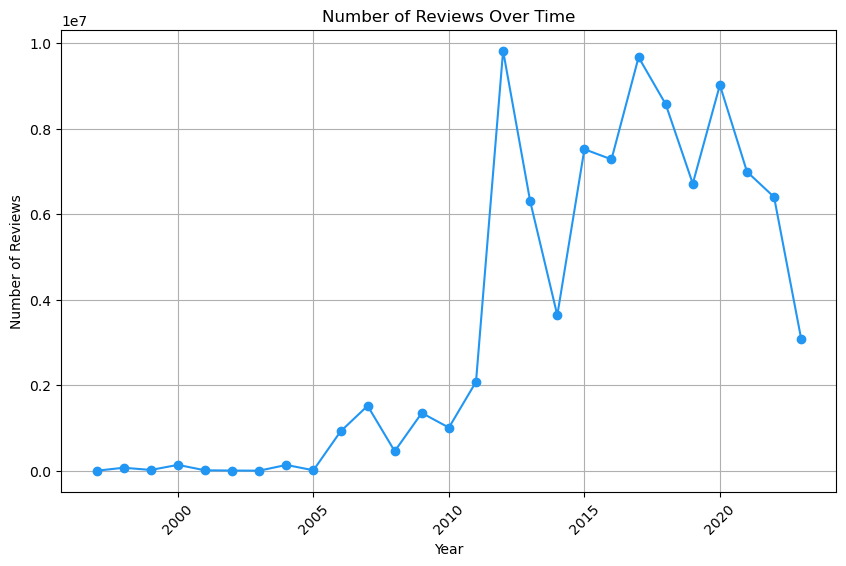

In [120]:
# Plot the number of reviews over time (by year)
plt.figure(figsize=(10, 6))
plt.plot(reviews_by_year.index, reviews_by_year.values, marker='o', linestyle='-', color='#2196F3')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')

# Add grid and display
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


We can see a significant increase in reviews in 2012, however that year does not bring drastic jumps in the ratings over time plot.

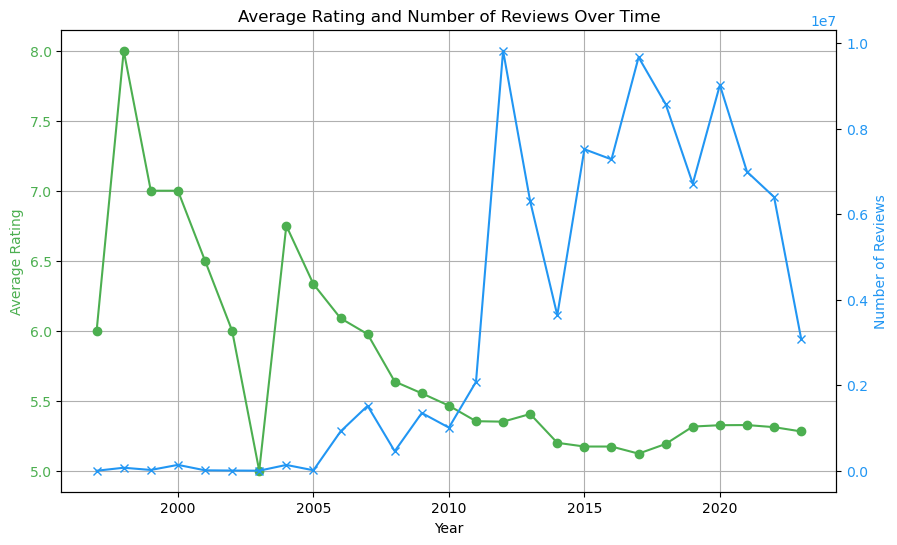

In [122]:
#Plotting both on the same graph to make it easier to compare visually

# Plot the average rating on the primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(avg_rating_by_year.index, avg_rating_by_year.values, marker='o', linestyle='-', color='#4CAF50', label='Average Rating')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rating', color='#4CAF50')
ax1.tick_params(axis='y', labelcolor='#4CAF50')

# Create a secondary y-axis to plot the number of reviews
ax2 = ax1.twinx()
ax2.plot(reviews_by_year.index, reviews_by_year.values, marker='x', linestyle='-', color='#2196F3', label='Number of Reviews')
ax2.set_ylabel('Number of Reviews', color='#2196F3')
ax2.tick_params(axis='y', labelcolor='#2196F3')

# Add a title and grid
plt.title('Average Rating and Number of Reviews Over Time')
ax1.grid(True)

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

With this we can notice that there is no significant overlap between the two. However, we do know that over time eith easier access to technology more people gained interest in playing video games. We can also assume that, with more games being produced over time, people refined their likings of specific games and have more narrow preferences than before, but there is no way to actually prove this theory.

In [124]:
#Another potentially interesting graph is seeing the prices of games over time

# Group by release year and calculate the average price for each year
avg_price_by_year = games.groupby('release_year')['price_final'].mean()

# Display the results
print(avg_price_by_year)

release_year
1997     4.995000
1998     9.990000
1999     3.326667
2000     7.490000
2001     4.990000
2002     4.940000
2003     5.990000
2004     8.740000
2005     1.160000
2006     6.901786
2007     7.463659
2008     8.967466
2009     9.501025
2010     8.366303
2011     8.433165
2012     9.510566
2013     9.757214
2014     9.033061
2015     7.833925
2016     7.571791
2017     7.676552
2018     7.615424
2019     8.339868
2020     8.459524
2021     8.439894
2022     9.917744
2023    11.239883
Name: price_final, dtype: float64


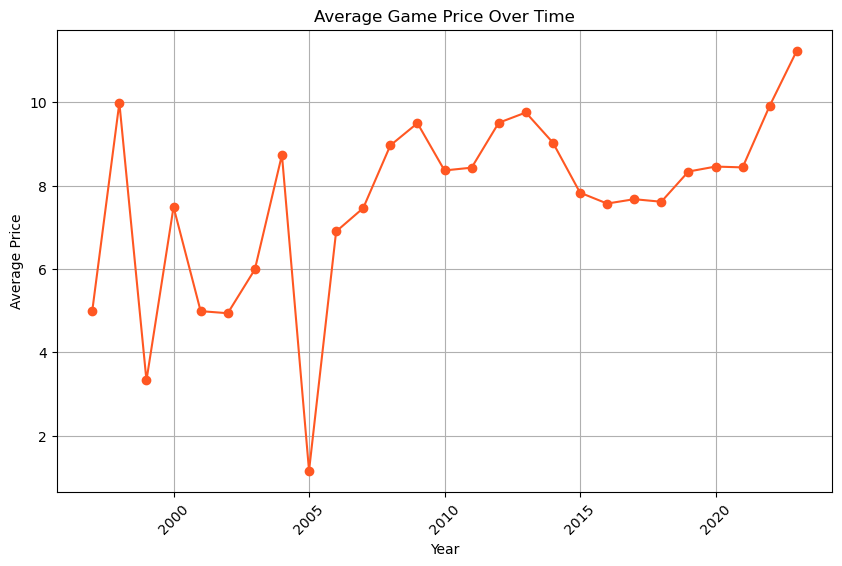

In [125]:
# Plot the average prices over time (by year)
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', linestyle='-', color='#FF5722')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Game Price Over Time')

# Add grid and display
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


This shows us that, on average, the games were cheapest in 2005, and are currently the most expensive they ever were.
However, we also have previously noticed that there is a big number of free games, so I'd like to visualise the number of free games over time.

In [159]:
# Filter for free games and count the number of free games per year
free_games_by_year = games[games['price_final'] == 0].groupby('release_year').size()

# Display the results
print(free_games_by_year)

release_year
1997       1
1999       1
2005       1
2006       5
2007       7
2008      13
2009      13
2010      14
2011      21
2012      36
2013      51
2014     154
2015     316
2016     611
2017     857
2018    1015
2019     991
2020    1294
2021    1411
2022    1567
2023     726
dtype: int64


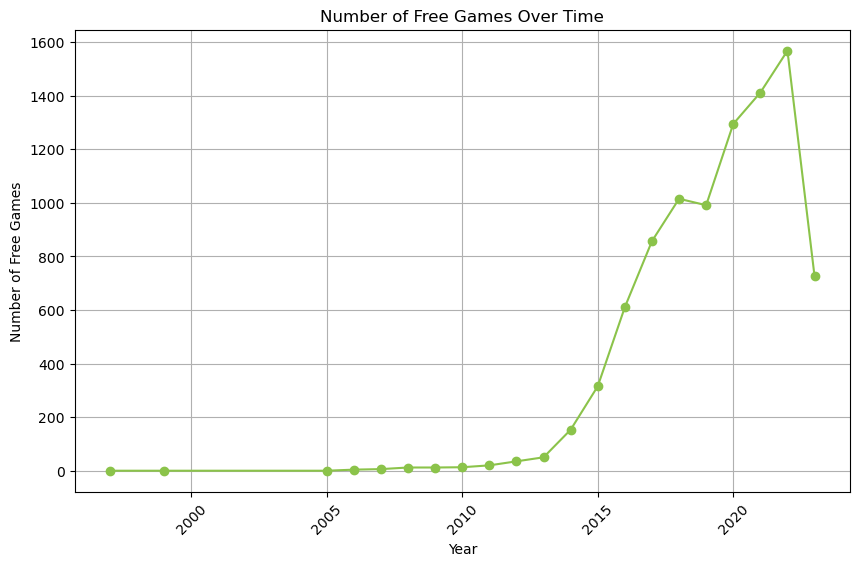

In [127]:
# Plot the number of free games over time (by year)
plt.figure(figsize=(10, 6))
plt.plot(free_games_by_year.index, free_games_by_year.values, marker='o', linestyle='-', color='#8BC34A')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Free Games')
plt.title('Number of Free Games Over Time')

# Add grid and display
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


This shows us that, although we can't say that there is a significant increase in average game price, there definitely is a big increasy in number of free games released each year, with that number starting to drop in the year 2023.

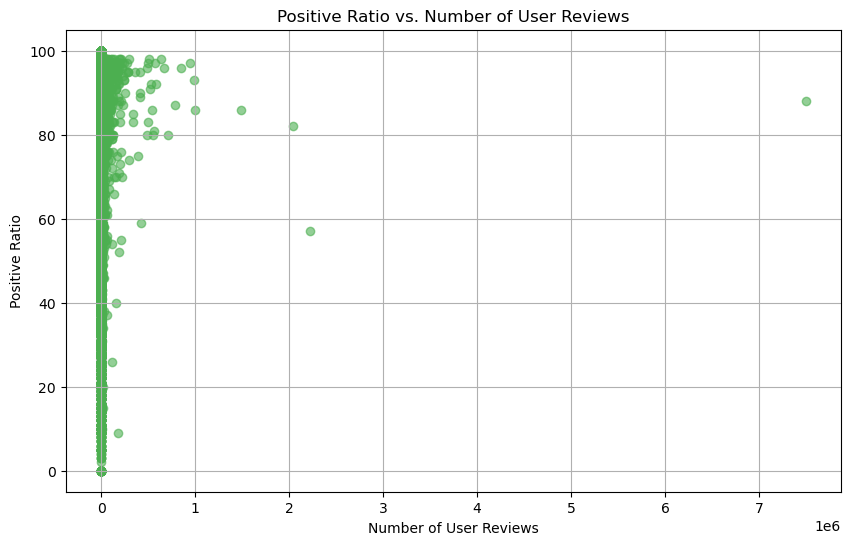

In [132]:
#Presenting how the number of reviews has affected the amount of positive ratings

# Scatter plot: user_reviews vs. positive_ratio
plt.figure(figsize=(10, 6))
plt.scatter(games['user_reviews'], games['positive_ratio'], alpha=0.6, color='#4CAF50')

# Labels and title
plt.xlabel('Number of User Reviews')
plt.ylabel('Positive Ratio')
plt.title('Positive Ratio vs. Number of User Reviews')

# Display the plot
plt.grid(True)
plt.show()


In [133]:
# Calculate Pearson correlation between user_reviews and positive_ratio
correlation = games[['user_reviews', 'positive_ratio']].corr().iloc[0, 1]

print(f"Pearson Correlation Coefficient: {correlation}")


Pearson Correlation Coefficient: 0.021067961210372608


This means that there is no correlation between the number of reviews and how positive or negative the reviews are.

In [161]:
#Looking for 5 highest positive_ratio games with the biggest number of reviews

highestGames = games[games['positive_ratio'] == 100]
sortedHighest = highestGames.sort_values(by = 'user_reviews', ascending = False)

sortedHighest.head(5)

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,rating_numeric,release_year
2287,2206340,Aokana - Four Rhythms Across the Blue - EXTRA2,2022-12-16,True,False,False,100,530,24.99,24.99,0.0,True,8,2022
49175,2262610,Endless Monday: Dreams and Deadlines,2023-05-04,True,True,True,100,327,9.99,9.99,0.0,True,6,2023
15840,992740,祈風 Inorikaze,2019-02-13,True,False,False,100,306,10.99,10.99,0.0,True,6,2019
50550,2443110,South Scrimshaw Part One,2023-06-09,True,False,True,100,302,0.00,0.00,0.0,True,6,2023
46048,1422050,UOS Prototype,2020-10-12,True,False,False,100,197,0.00,0.00,0.0,True,6,2020


In [162]:
#Looking for 5 lowest positive_ratio games with the biggest number of reviews

lowestGames = games[games['positive_ratio'] == 0]
sortedLowest = lowestGames.sort_values(by = 'user_reviews', ascending = False)

sortedLowest.head(5)

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,rating_numeric,release_year
41345,210490,Fray: Reloaded Edition,2012-06-19,True,False,False,0,42,0.00,0.00,0.0,True,3,2012
39630,586100,Heroes in the Sky-Origin,2019-01-04,True,False,False,0,20,2.99,2.99,0.0,True,3,2019
37140,862520,Lucky Night: Poker Games,2018-08-07,True,False,False,0,14,0.99,0.99,0.0,True,3,2018
30287,1915410,Arachnophobia,2022-04-26,True,False,False,0,14,2.99,2.99,0.0,True,3,2022
27792,984080,Christmas Carol,2018-11-19,True,False,False,0,13,9.99,9.99,0.0,True,3,2018


In [163]:
#Looking for 5 highest rated games with the biggest number of reviews

bestGames = games[games['rating_numeric'] == 6]
sortedBest = bestGames.sort_values(by = 'user_reviews', ascending = False)

sortedBest.head(5)

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,rating_numeric,release_year
14398,730,Counter-Strike: Global Offensive,2012-08-21,True,True,True,88,7494460,15.0,0.0,0.0,True,6,2012
13176,570,Dota 2,2013-07-09,True,True,True,82,2045628,0.0,0.0,0.0,True,6,2013
12717,271590,Grand Theft Auto V,2015-04-13,True,False,False,86,1484122,0.0,0.0,0.0,True,6,2015
14535,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,True,False,False,86,993312,20.0,0.0,0.0,True,6,2015
47380,440,Team Fortress 2,2007-10-10,True,True,True,93,985819,0.0,0.0,0.0,True,6,2007


In [164]:
#Looking for 5 lowest rated games with the biggest number of reviews

worstGames = games[games['rating_numeric'] == 0]
sortedWorst = worstGames.sort_values(by = 'user_reviews', ascending = False)

sortedWorst.head(5)

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,rating_numeric,release_year
14286,2357570,Overwatch® 2,2023-08-10,True,False,False,9,181198,0.00,0.00,0.0,True,0,2023
3247,1180320,War of the Three Kingdoms,2021-12-17,True,False,False,15,21276,0.00,0.00,0.0,True,0,2021
3440,1416420,Expansion - Europa Universalis IV: Leviathan,2021-04-27,True,True,True,10,4723,19.99,19.99,0.0,True,0,2021
36407,246090,Spacebase DF-9,2014-10-27,True,True,True,18,3261,9.99,9.99,0.0,True,0,2014
34096,201510,Flatout 3: Chaos & Destruction,2011-12-13,True,False,False,15,2766,9.99,9.99,0.0,True,0,2011


In [165]:
#Looking for 10 most reviewed games

mostReviewed = games.sort_values(by = 'user_reviews', ascending = False)

mostReviewed.head(10)

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,rating_numeric,release_year
14398,730,Counter-Strike: Global Offensive,2012-08-21,True,True,True,88,7494460,15.0,0.0,0.0,True,6,2012
47770,578080,PUBG: BATTLEGROUNDS,2017-12-21,True,False,False,57,2217226,0.0,0.0,0.0,True,4,2017
13176,570,Dota 2,2013-07-09,True,True,True,82,2045628,0.0,0.0,0.0,True,6,2013
12717,271590,Grand Theft Auto V,2015-04-13,True,False,False,86,1484122,0.0,0.0,0.0,True,6,2015
14535,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,True,False,False,86,993312,20.0,0.0,0.0,True,6,2015
47380,440,Team Fortress 2,2007-10-10,True,True,True,93,985819,0.0,0.0,0.0,True,6,2007
13035,105600,Terraria,2011-05-16,True,True,True,97,943413,10.0,0.0,0.0,True,8,2011
15363,4000,Garry's Mod,2006-11-29,True,True,True,96,853733,10.0,0.0,0.0,True,8,2006
13173,252490,Rust,2018-02-08,True,True,False,87,786668,40.0,0.0,0.0,True,6,2018
14376,1172470,Apex Legends™,2020-11-04,True,False,False,80,713182,0.0,0.0,0.0,True,6,2020


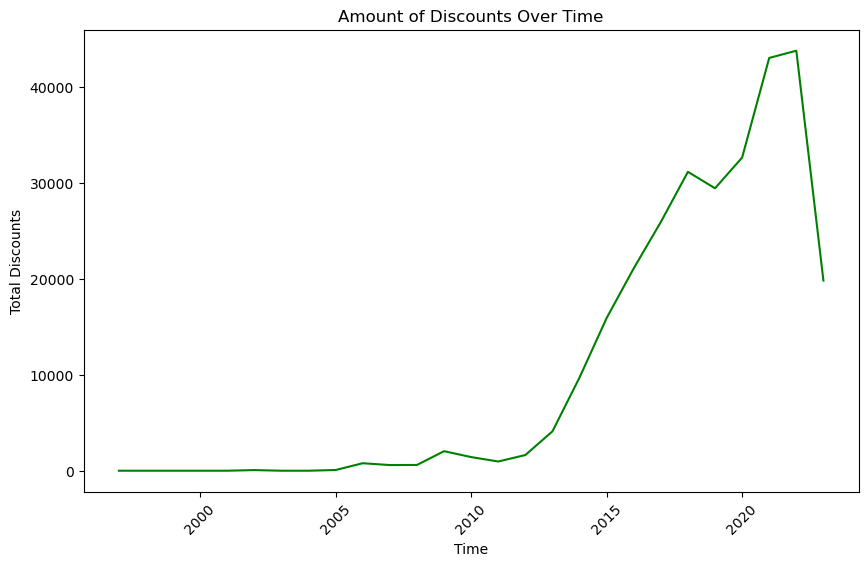

In [169]:
#Showing the amount of discounts over time

# Group by year and sum the discounts
discounts_over_time = games.groupby('release_year')['discount'].sum()

# Plot the result
plt.figure(figsize=(10, 6))
discounts_over_time.plot(kind='line', color='green')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Total Discounts')
plt.title('Amount of Discounts Over Time')

# Display the plot
plt.xticks(rotation=45)
plt.show()

We see that there are more discounted games over time, but there are also more games over time. Therefore we should observe the percentage of how many games got discounted each year out of all the games released that year.

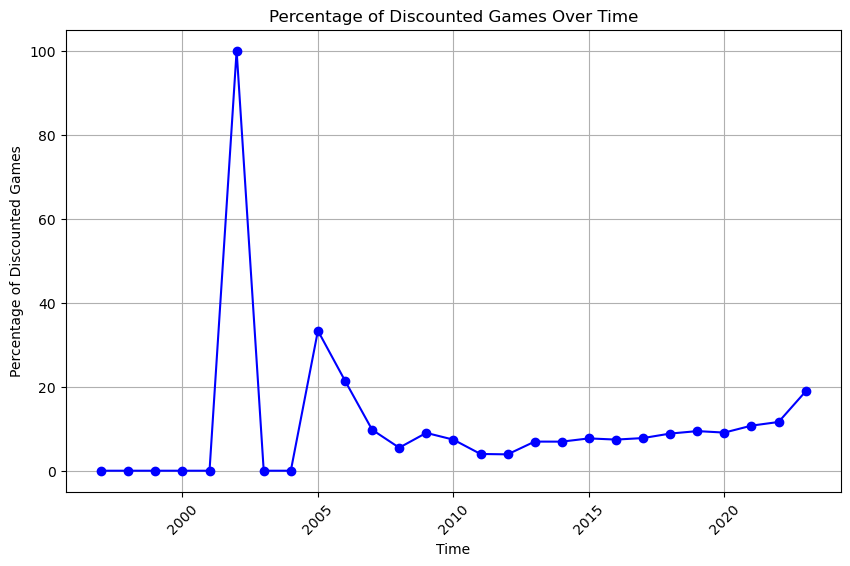

In [173]:
# Create a new column to identify discounted games (1 for discounted, 0 for not discounted)
games['is_discounted'] = games['discount'] > 0  

# Group by the year and calculate the percentage of discounted games
discount_percentage_over_time = games.groupby('release_year').apply(
    lambda x: (x['is_discounted'].sum() / len(x)) * 100
)

# Plot the result
plt.figure(figsize=(10, 6))
discount_percentage_over_time.plot(kind='line', marker='o', color='blue')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Percentage of Discounted Games')
plt.title('Percentage of Discounted Games Over Time')

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Now we see that all games released in 2002 got discounted.

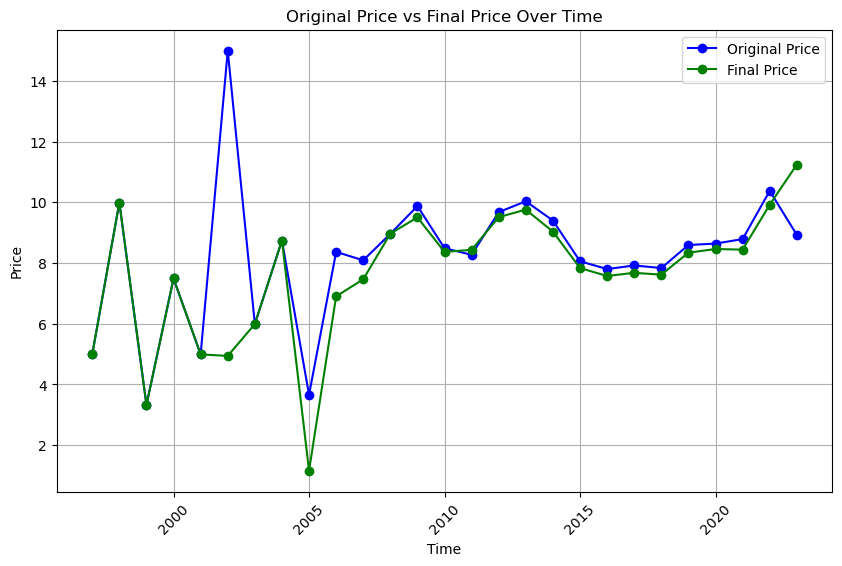

In [177]:
#Comparing the final and original price of games over time

# Group by year and calculate the mean of 'original_price' and 'final_price'
prices_over_time = games.groupby('release_year')[['price_original', 'price_final']].mean()

# Plot the result
plt.figure(figsize=(10, 6))

# Plot original price and final price over time
prices_over_time['price_original'].plot(kind='line', marker='o', color='blue', label='Original Price')
prices_over_time['price_final'].plot(kind='line', marker='o', color='green', label='Final Price')

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Original Price vs Final Price Over Time')
plt.legend()

# Display the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Here we can again notice the price drop that happened with all the discounts in 2002.

Findings: 
- The ratio of positively rated games increases (there are more games with high positive ratio than games with low positive ratio)
- Majority of games are low priced (most of them are free)
- Game rating is distributed almost as a bell curve, where most games have a rating of 5, then 6, then 4, then 7, then 1, 8, 3, 2, and 0
- All games are supported on Steam Deck, most on Windows, some on Mac and even less on Linux
- Game platform does not affect the game rating
- Game rating is decreasing over time, with newly released games having lower ratings than the older games
- The number of reviews increases over time, with newer games having more reviews than the older games
- Number of reviews and the rating do not correlate
- Prices of games are increasing over time
- The number of free games also increases over time
- There is no correlation between the number of reviews and ratio of positive reviews
- The 5 highest positive ratio games with the most reviews are: Aokana - Four Rhythms Across the Blue - EXTRA2, Endless Monday: Dreams and Deadlines, 祈風 Inorikaze, South Scrimshaw Part One, UOS Prototype
- The 5 lowest positive ratio games with the most reviews are: Fray: Reloaded Edition, Heroes in the Sky-Origin, Lucky Night: Poker Games, Arachnophobia, Christmas Carol
- The 5 highest rated games with most reviews are: Counter-Strike: Global Offensive, Dota 2, Grand Theft Auto V, Tom Clancy's Rainbow Six® Siege, Team Fortress 2
- The 5 lowest rated games with the most reviews are: Overwatch® 2, War of the Three Kingdoms, Expansion - Europa Universalis IV: Leviathan, Spacebase DF-9, Flatout 3: Chaos & Destruction
- Top 10 most reviewed games are: Counter-Strike: Global Offensive, PUBG: BATTLEGROUNDS, Dota 2, Grand Theft Auto V, Tom Clancy's Rainbow Six® Siege, Team Fortress 2, Terraria, Garry's Mod, Rust, Apex Legends™
- Most of the discounted games were in 2002, with the second peak at 2005. Otherwise the number of discounted games compared to all games released each year is slowly increasing